<a href="https://colab.research.google.com/github/amifra8uni/LabCMP/blob/main/Esame_28_gennaio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motion of a Satellite in Earth's Atmosphere
## Esame del 28 gennaio 2022

Use Python for the following tasks.
1. Show that the results of `app.cpp` are correct if you simulate the free fall of a point mass ($A = 0$), that is, that they match $y(t)= gt^2/2$ and are indipendent of $m$. Use $r_0 = 250$ m and $\Delta t = 0.01$ s. 

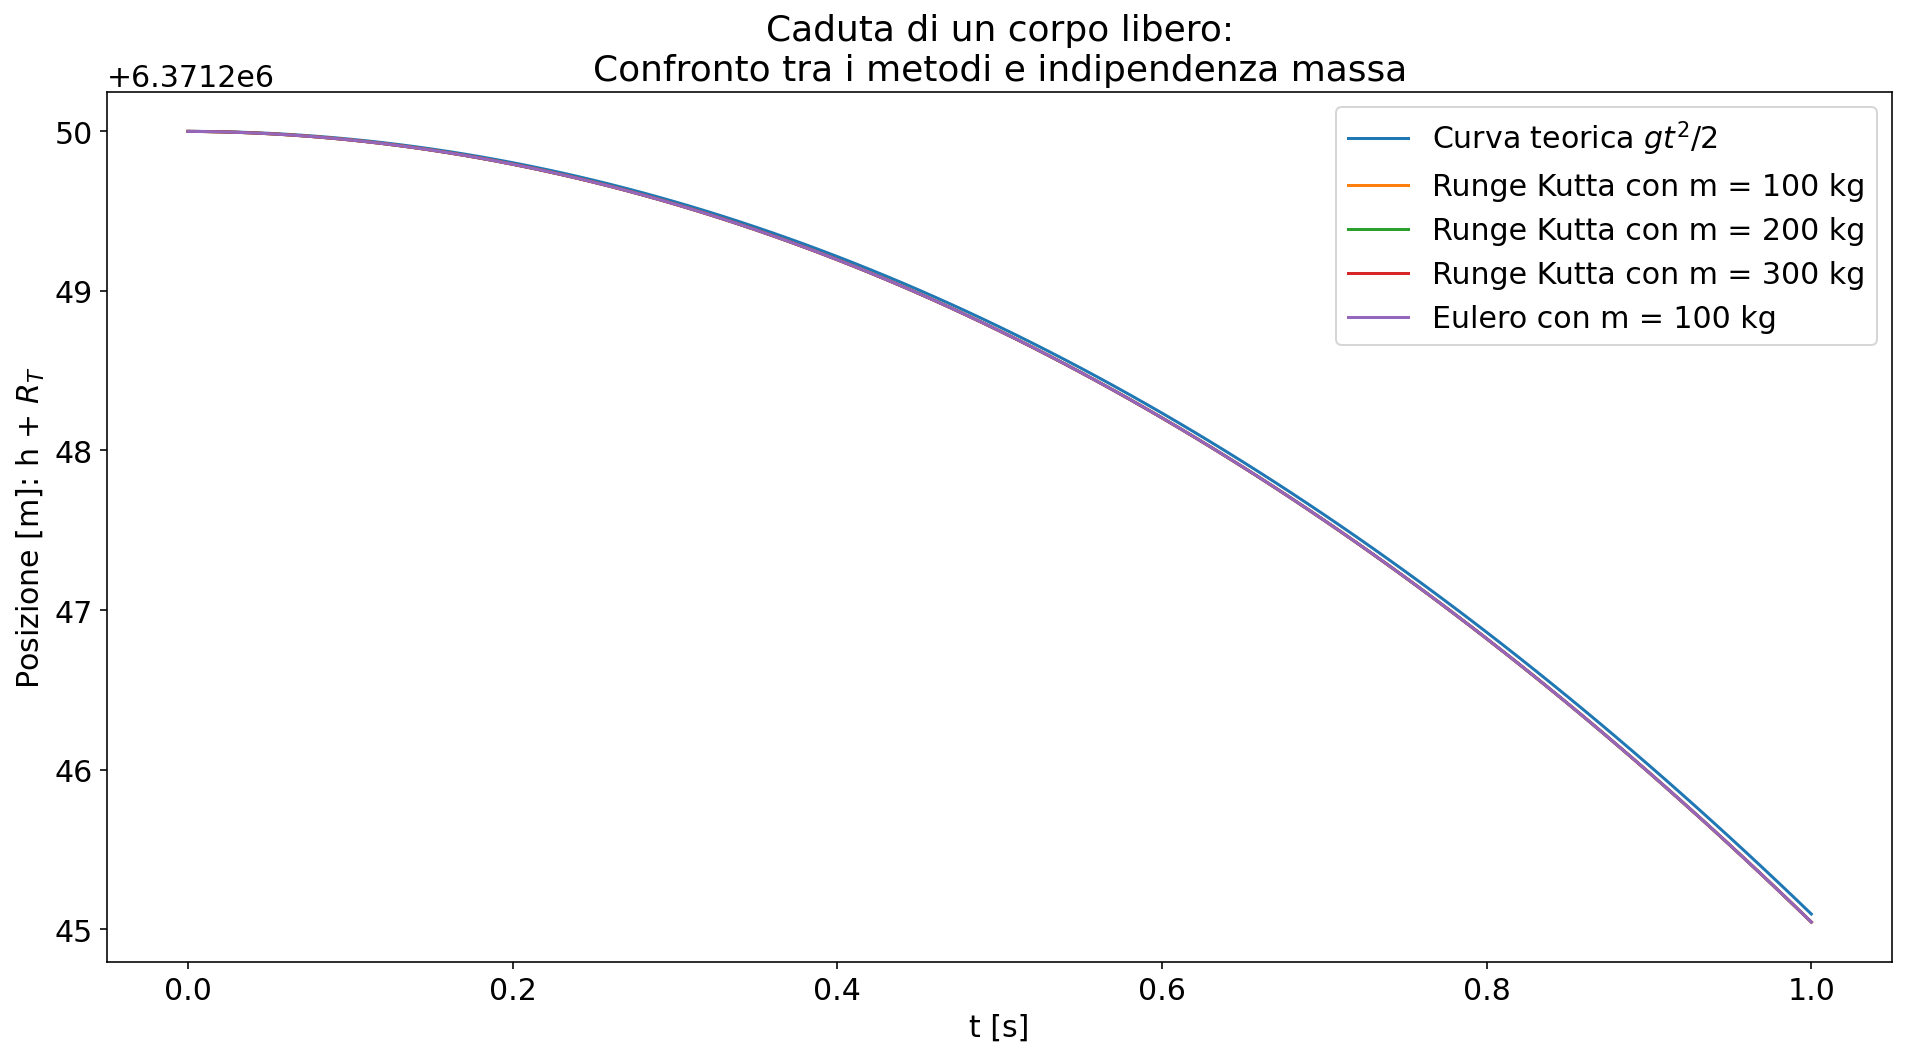

In [42]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.figure(figsize=(16,8))
plt.rc('font', size=15) 

# Importo le coordinate x dell'oggetto dei file con le tre simulazioni RK2 con masse diverse
RK_100kg = 'sim1_RK_100.dat'
RK_200kg = 'sim1_RK_200.dat'
RK_300kg = 'sim1_RK_200.dat'
Eu_100kg = 'sim1_Eu_100.dat'
x1 = np.loadtxt(RK_100kg, unpack=True, usecols=0)
x2 = np.loadtxt(RK_200kg, unpack=True, usecols=0)
x3 = np.loadtxt(RK_300kg, unpack=True, usecols=0)
x1_Eu = np.loadtxt(Eu_100kg, unpack=True, usecols=0)

# Definisco una funzione per confrontare il valore teorico
def caduta_libera(t):
  g = 9.81; # m/s^2
  return x1[0] - 0.5*g*t*t;

# Grafico i tre andamenti
t = np.arange(len(x)*0.01, step = 0.01)
plt.plot(t, caduta_libera(t), label = "Curva teorica $gt^2/2$")
plt.plot(t, x1, label = "Runge Kutta con m = 100 kg")
plt.plot(t, x2, label = "Runge Kutta con m = 200 kg")
plt.plot(t, x3, label = "Runge Kutta con m = 300 kg")
plt.plot(t, x1_Eu, label = "Eulero con m = 100 kg")
plt.title("Caduta di un corpo libero:\nConfronto tra i metodi e indipendenza massa")
plt.xlabel("t [s]")
plt.ylabel(r"Posizione [m]: h + $R_T$")
plt.legend()
plt.show()